# Imports

In [1]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pydub import AudioSegment
import wave
import math

# Load data

In [2]:
model_name = 'flowtron'

In [3]:
main_directory = os.getcwd() + "\\..\\datasets\\{}\\\wavs\\".format(model_name)
audio_lengths = []

files = [f for f in os.listdir(main_directory) if os.path.isfile(os.path.join(main_directory, f))]
for f in files:
    audio = AudioSegment.from_file(main_directory + f)
    audio_lengths.append(audio.duration_seconds)

data = pd.DataFrame(audio_lengths, columns=["Length"])
data["Length"].describe()

count    14291.000000
mean         3.180969
std          2.021285
min          0.341905
25%          1.655374
50%          2.558866
75%          4.254875
max          9.984898
Name: Length, dtype: float64

# Dataset length (s)

In [4]:
data_audio = data["Length"].sum()
data_audio_formatted = '{} hours {} minutes {} seconds'.format(
    math.floor(data_audio / 3600), 
    math.floor((data_audio % 3600) / 60),
    round((data_audio % 3600) % 60, 1))
print("Total dataset length:", data_audio_formatted)

Total dataset length: 12 hours 37 minutes 39.2 seconds


# Speakers lenghts

In [5]:
punctuation = list(',.!?')
letters = list('AĄBCĆDEĘFGHIJKLŁMNŃOÓPRSŚTUWYZŹŻaąbcćdeęfghijklłmnńoóprsśtuwyzźż ')
symbols = punctuation + letters
speakers = {}

with open('../flowtron_speakers.csv', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        line_split = line.split('|')
        id = line_split[0]
        name = line_split[1].strip()
        speakers[id] = {'name': name, 'length': 0}

with open(os.path.join(os.getcwd() + "\\..\\datasets\\flowtron\\list.txt"), 'r', encoding='utf-8') as f:
    for line in f.readlines():
        line_split = line.split('|')
        file = line_split[0][5:]
        text = line_split[1]
        id = line_split[2].strip()
        if '  ' in text:
            print('Double space in line: {}'.format(line))
            break
        if text[-1] not in symbols:
            print('Wrong text end symbol in line: {}'.format(line))
            break
        for char in text:
            if char not in symbols:
                print('Wrong character: {}, in line: {}'.format(char, line))
                break
        if not id.isdigit():
            print('Wrong character in speaker id in line: {}'.format(line))
            break

        audio = AudioSegment.from_file(main_directory + file)
        length = speakers[id]['length'] + audio.duration_seconds / 60
        speakers[id]['length'] = length

speakers = dict(sorted(speakers.items(), key=lambda item: item[1]['length'], reverse=True))
for _, val in speakers.items():
    print(val)

{'name': 'Bezimienny z Gothica', 'length': 203.4701708238853}
{'name': 'Geralt z Wiedźmina 3', 'length': 50.644748299319645}
{'name': 'Regis', 'length': 37.723553287981865}
{'name': 'Yennefer', 'length': 36.1010831443689}
{'name': 'Triss', 'length': 34.06361753590326}
{'name': 'Mroczny elf', 'length': 32.68976266061979}
{'name': 'Diego', 'length': 22.819672713529865}
{'name': "Gaunter o'Dim", 'length': 21.381912320483764}
{'name': 'Arngeir', 'length': 20.72299622071049}
{'name': 'Ciri', 'length': 20.248260015117165}
{'name': 'Jaskier', 'length': 19.979926681783816}
{'name': 'Lee', 'length': 18.72081179138321}
{'name': 'Zoltan Chivay', 'length': 18.617421012849587}
{'name': 'Vesemir', 'length': 18.2775812547241}
{'name': 'Xardas', 'length': 16.33548828420257}
{'name': 'Dijkstra', 'length': 16.11821390778534}
{'name': 'Generał Tullius', 'length': 13.181114890400606}
{'name': 'Guślarz', 'length': 10.504569916855635}
{'name': 'Sheogorath', 'length': 10.071900982615269}
{'name': 'Koleś z Po

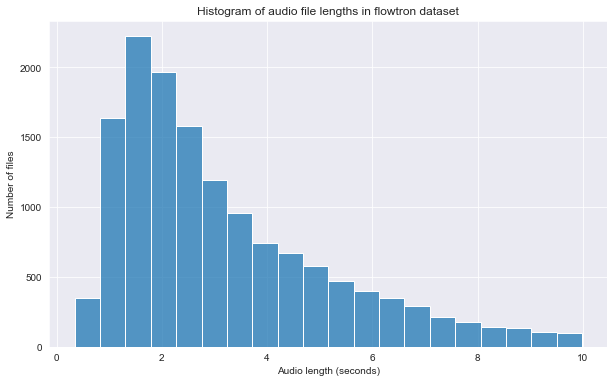

In [6]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(data["Length"], bins=20, kde=False)
plt.xlabel("Audio length (seconds)")
plt.ylabel("Number of files")
plt.title("Histogram of audio file lengths in {} dataset".format(model_name));

# Sample file

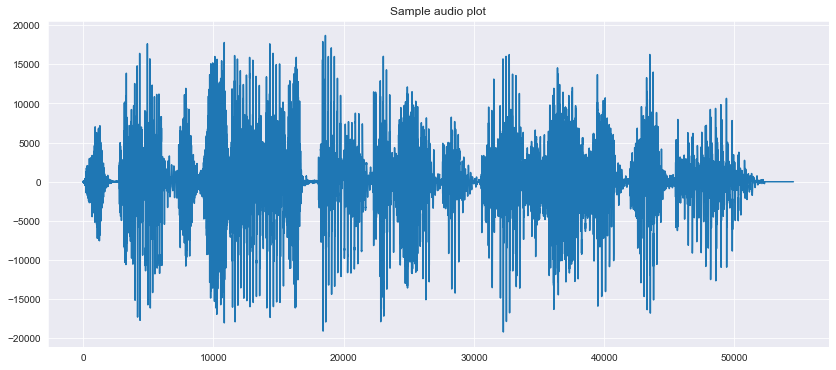

In [7]:
file_name = main_directory + "DIA_ADDON_1013_BANDIT_FROMCAVALORN_15_00.wav"
audio_file = wave.open(file_name, "r")
signal = audio_file.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
plt.figure(figsize=(14, 6))
sns.lineplot(data=signal)
plt.title("Sample audio plot");